
# Project: Investigate a [TMDb movie data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)

>This project provide by **[Udacity](https://www.udacity.com/course/data-analyst-nanodegree--nd002)** for Data Analyst Nanoodegree Programe

# Analyst by : *Odai Alsalieti*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="top"></a>

<a id='intro'></a>
## Introduction
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

To start Analysis we need to Answer these questions:

<ol>
    <li><a href="#q1">Question 1: What is The most type of movies produced?</a></li>
    <li><a href="#q2">What are the highest-grossing movies?</a></li>
    <li><a href="#q3">What are the movies that got the most votes average?</a> </li>
    <li><a href="#q4">Is there any relationship between vote average and runtime of movies?</a></li>
    <li><a href="#q5">Is there any relation between popularity and runtime?</a></li>
    <li><a href="#q6">Is there any relation between popularity and vote_avg?</a></li>
    <li><a href="#q7">Question7: Is there any relation between budget and revenue?</a></li>
</ol>





In [1]:
# import statements for all of the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# using'magic word' so that your visualizations are plotted inline
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data
df = pd.read_csv('movies.csv')
print(df.shape)
df.head(2)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [4]:
#check duplicated
df.duplicated().sum()

1

>Since the number of duplicates is one, it is okay to drop it

In [5]:
#drop duplicated
df.drop_duplicates(inplace=True)

In [6]:
# check if duplicate was droped 
df.duplicated().sum()

0

In [7]:
#check null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>in the column genre I notice that the values was separated by '|', so i will split them and take 1st value then drop the other using:
[Split column by delimiter into multiple columns](https://datascienceparichay.com/article/pandas-split-column-by-delimiter/)

In [8]:
#split genre content
df[['genre','genres2','genres3','genres4','genres5']] = df['genres'].str.split('|', expand=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,genres2,genres3,genres4,genres5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [9]:
#Drop coulmns that i don't need in my analysis
data = [
    'id',
    'release_date',
    'release_year',
    'director',
    'production_companies',
    'homepage',
    'tagline',
    'keywords',
    'imdb_id',
    'overview',
    'vote_count',
    'cast',
    'genres',
    'genres2',
    'genres3',
    'genres4',
    'genres5',
    'budget_adj',
    'revenue_adj'
]

df.drop(columns=data, axis=1, inplace=True)

In [10]:
# drop nan value
df.dropna(inplace=True)
print(df.shape)
df.head()

(10842, 7)


,popularity,budget,revenue,original_title,runtime,vote_average,genre
0,32.985763,150000000,1513528810,Jurassic World,124,6.5,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,7.1,Action
2,13.112507,110000000,295238201,Insurgent,119,6.3,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,7.5,Action
4,9.335014,190000000,1506249360,Furious 7,137,7.3,Action


In [11]:
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
vote_average      0
genre             0
dtype: int64

In [12]:
df.describe()

,popularity,budget,revenue,runtime,vote_average
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,5.974064
std,1.001032,3.093971e+07,1.171179e+08,31.294612,0.934257
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,5.400000
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,6.000000
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000


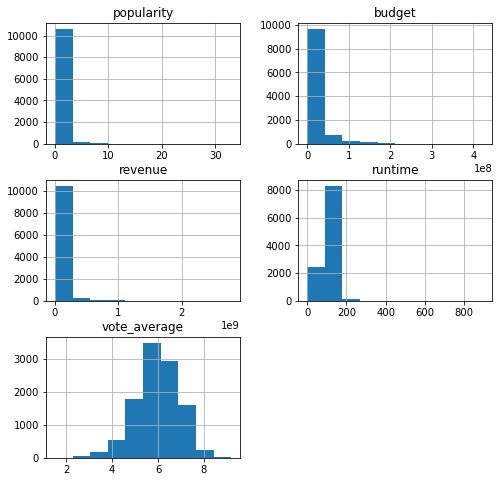

In [13]:
#plot all data values
df.hist(
    figsize=(8,8)
);

<a id='eda'></a>
## Exploratory Data Analysis

> Here we Answer the questions posed in introduction

<h1><a id='q1'>Question 1: What is The most type of movies produced?</a> </h1>

> First i count genre value then plot it for better vision

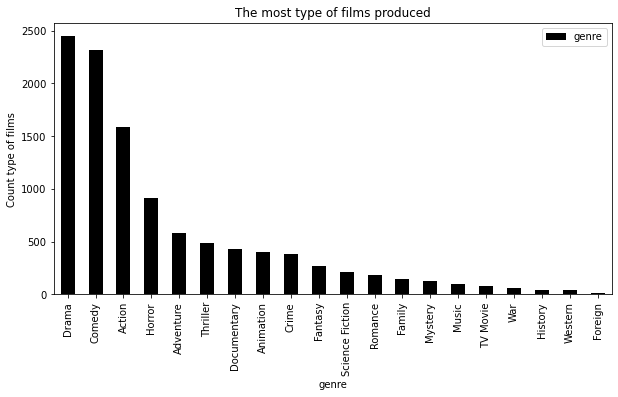

In [14]:
# count genre value
genre = df['genre'].value_counts()
# plot genre value to check the most type produced
genre.plot(
    title='The most type of films produced',
    kind='bar',
    color='#000',
    xlabel='genre',
    ylabel='Count type of films',
    legend = 'genre',
    figsize = (10,5)
);


# Answer question1: The 10 most type of movies produced
FRom the plot we realase that:

    - Drama              876
    - Comedy             775
    - Action             684
    - Adventure          312
    - Horror             272
    - Crime              171
    - Thriller           160
    - Fantasy            109
    - Animation          101

<a href='#top'>Go to Top of page ^ </a>

<h1><a id='q2'>Question 2: What are the highest-grossing movies?</a></h1>


> First I check if there are 0 value in: budget, revenue, runtime

In [15]:
#check for 0 value in budget col
df[df['budget']== 0].shape

(5674, 7)

In [16]:
#check for 0 value in revenue col
df[df['revenue']==0].shape

(5993, 7)

In [17]:
#check for 0 value in runtime col
df[df['runtime']==0].shape

(30, 7)

>There are some movies that have not recorded their budget, revenue, or even their runtime
In order for the comparison to be fair, we must drop the NaN values so I [Replace 0 with NaN](https://stackoverflow.com/questions/49575897/cant-replace-0-to-nan-in-python-using-pandas/49576082) to drop it



In [18]:
#Replace 0 with NaN
df.replace(0, np.nan, inplace=True)

In [19]:
# check if they replaced by NaN
df.isnull().sum()

popularity           0
budget            5674
revenue           5993
original_title       0
runtime             30
vote_average         0
genre                0
dtype: int64

In [20]:
#drop all NaN value
df_dropna = df.dropna()

To Avoid this error

>SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

i saved a copy of droped in new csv file

In [21]:
# save new dataframe
df_dropna.to_csv('df_movies_droped.csv',index = False)
df_drp = pd.read_csv('df_movies_droped.csv')

In [22]:
# check new dataframe df_drp
print(df_drp.shape)
df_drp.head()

(3854, 7)


,popularity,budget,revenue,original_title,runtime,vote_average,genre
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,6.5,Action
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,7.1,Action
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,6.3,Adventure
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,7.5,Action
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,7.3,Action


In [23]:
df_drp.describe()

,popularity,budget,revenue,runtime,vote_average
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,6.168163
std,1.475162,4.220822e+07,1.765393e+08,19.922820,0.794920
min,0.001117,1.000000e+00,2.000000e+00,15.000000,2.200000
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,5.700000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,6.200000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,6.700000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000


> I want to calculate the profit of each movie so I add a column to hold the results

In [24]:
# Add column that calculate the profit of each movie
df_drp['profit'] = df_drp['revenue'] - df_drp['budget']
df_drp.head()

,popularity,budget,revenue,original_title,runtime,vote_average,genre,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,6.5,Action,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,7.1,Action,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,6.3,Adventure,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,7.5,Action,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,7.3,Action,1.316249e+09


> Sort the profit ascending to know the top 10 movies who have highest profit

In [25]:
# Sort ascending profits
top_profit=df_drp.sort_values(['profit'], ascending=False)
top_profit

,popularity,budget,revenue,original_title,runtime,vote_average,genre,profit
344,9.432768,237000000.0,2.781506e+09,Avatar,162.0,7.1,Action,2.544506e+09
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,7.5,Action,1.868178e+09
1767,4.355219,200000000.0,1.845034e+09,Titanic,194.0,7.3,Drama,1.645034e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,6.5,Action,1.363529e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,7.3,Action,1.316249e+09
...,...,...,...,...,...,...,...,...
1667,1.653031,100000000.0,2.500000e+02,Brother Bear,85.0,6.8,Animation,-9.999975e+07
1196,0.921653,150000000.0,3.899276e+07,Mars Needs Moms,88.0,5.5,Adventure,-1.110072e+08
2472,0.948560,145000000.0,2.581996e+07,The Alamo,137.0,5.9,Western,-1.191800e+08
1931,1.214510,255000000.0,8.928991e+07,The Lone Ranger,149.0,6.0,Action,-1.657101e+08


In [26]:
#check top 10
top_profit[['original_title', 'profit']].head(10)

,original_title,profit
344,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
1767,Titanic,1.645034e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09
1488,The Avengers,1.299558e+09
1102,Harry Potter and the Deathly Hallows: Part 2,1.202818e+09
14,Avengers: Age of Ultron,1.125036e+09
1857,Frozen,1.124219e+09
2866,The Net,1.084280e+09


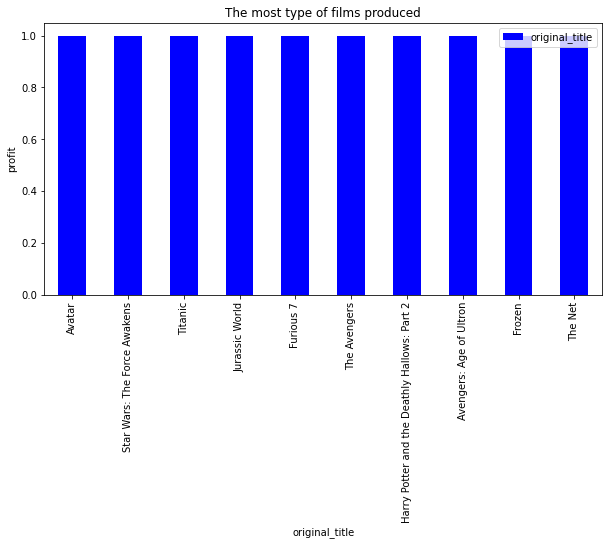

In [27]:
#plot top 10 profit
prof = top_profit['original_title'].iloc[:10].value_counts()
prof.plot(
   title='The most type of films produced',
    kind='bar',
    color='blue',
    xlabel='original_title',
    ylabel='profit',
    legend='original_title',
    figsize = (10,5)
);

# Answer Question2:
<h1>The top 10 highest profit movies are: </h1>
<ol>
    <li>Avatar: <b>2.544506e+09</b> </li>
<li>Star Wars: The Force Awakens:	<b>1.868178e+09</b></li>
<li>Titanic:	<b>1.645034e+09</b></li>
<li>Jurassic World	<b>1.363529e+09</b></li>
<li>Furious 7	<b>1.316249e+09</b></li>
<li>The Avengers	<b>1.299558e+09</b></li>
<li>Harry Potter and the Deathly Hallows: Part 2	<b>1.202818e+09</b></li>
<li>Avengers: Age of Ultron	<b>1.125036e+09</b></li>
<li>Frozen	<b>1.124219e+09</b></li>
    <li>The Net	<b>1.084280e+09</b></li>
</ol>

<a href='#top'>Go to Top of page ^ </a>

<h1><a id='q3'>Question3: What are the movies that got the most votes average?</a></h1>

> sort data with ascending 'vote_average'

In [28]:
#top vote
top_vote=df.sort_values(['vote_average'], ascending=False)

In [29]:
#explore top vote data
top_vote[['original_title','vote_average', 'runtime', 'popularity']].head(10)

,original_title,vote_average,runtime,popularity
3894,The Story of Film: An Odyssey,9.2,900.0,0.006925
538,The Mask You Live In,8.9,88.0,0.114264
2269,Life Cycles,8.8,47.0,0.222293
1200,Black Mirror: White Christmas,8.8,74.0,0.129531
6911,Pink Floyd: Pulse,8.7,145.0,0.212010
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,163.0,0.067753
8221,A Personal Journey with Martin Scorsese Throug...,8.5,225.0,0.194889
8839,Dave Chappelle: Killin' Them Softly,8.5,57.0,0.157001
3690,The Art of Flight,8.5,80.0,0.321341
8411,Queen - Rock Montreal,8.5,138.0,0.302908


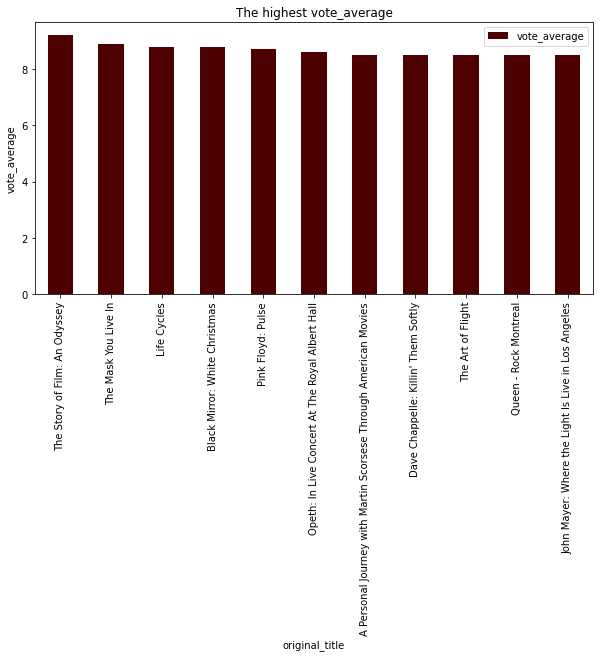

In [30]:
#plot the top 10 highest vote_average
top_vote.iloc[0:11].plot(
    x='original_title',
    y='vote_average',
    kind = 'bar',
    title='The highest vote_average',
    color= '#4d0000',
    xlabel='original_title',
    ylabel='vote_average',
    figsize = (10,5)
    
);

# Answer Question3: Top 10 vote average movies:
1- Pink Floyd: Pulse

    release_year: 2006
    vote_average: 8.7
2- Queen - Rock Montreal

    release_year: 1981
    vote_average: 8.5	
3- A Personal Journey with Martin Scorsese Throug...

    release_year: 1995
    vote_average: 8.5	
4- The Art of Flight

    release_year: 2011
    vote_average: 8.5	
5- The Shawshank Redemption	

    release_year: 1994
    vote_average: 8.4
6- The Jinx: The Life and Deaths of Robert Durst

    release_year: 2015
    vote_average: 8.4	
7- Guten Tag, RamÃ³n

    release_year: 2013
    vote_average: 8.4	
8- Stop Making Sense

    release_year: 1984
    vote_average: 8.4	
9- The Century of the Self

    release_year: 2002
    vote_average: 8.3	
10- Shoah

    release_year: 1985
    vote_average: 8.3


<a href='#top'>Go to Top of page ^ </a>

# Relationships

>In this section I will searche about relationships between some data

> Here i defined two functions To avoid repetition

In [31]:
#define function to plot histogram
def histplot(col,color,title):
    plt.hist(
    df_drp[col],
    rwidth = 0.9,
    bins =31,
    color=color,
    );
    ax = plt.gca()

    ax.set_title(title)

[scatter plot](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html)

In [32]:
# define function to plot scatter
def scatterVote(X,Y,Data,title):
    sns.lmplot(
    x=X,
    y=Y,
    data=Data,
    #scatter_kws={'color': 'darkgreen'},
    line_kws={'color': 'black'},
    );
    ax = plt.gca()

    ax.set_title(title)

    plt.show()

<h1><a id='q4'>Question 4: Is there any relationship between vote average and runtime of movies?</a></h1>

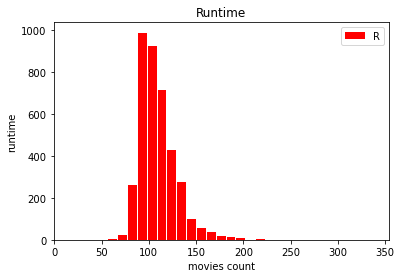

In [33]:
# plot Runtime
histplot('runtime','red', 'Runtime');
plt.xlabel('movies count');
plt.ylabel('runtime');
plt.legend('Runtime');

>Here I use df_drp data when we droped all NaN value because I used runtime to compare

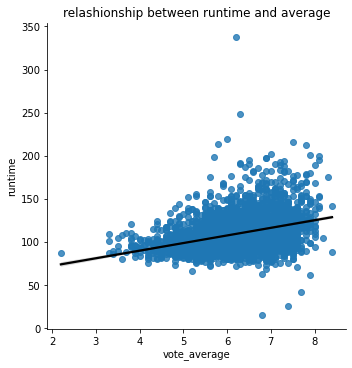

In [34]:
scatterVote("vote_average","runtime",df_drp, "relashionship between runtime and average")

# Answer Question4
From the plots above there is a relationship between the hight vote average and runtime

i.e. The higher the runtime, the higher the vote average

<a href='#top'>Go to Top of page ^ </a>

<h1><a id='q5'>Question 5: Is there any relation between popularity and runtime?</a></h1>

> Here I use df_drp data when we droped all NaN value because i used runtime to compare

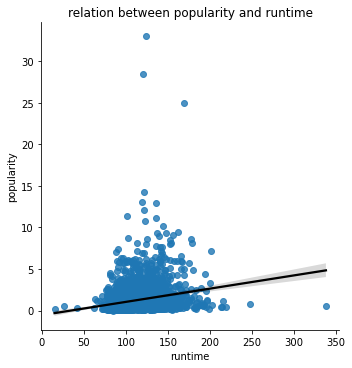

In [35]:
scatterVote("runtime","popularity",df_drp, "relation between popularity and runtime")

# Answer Question5: 
From the plots above there is a relationship between the hight vote average and runtime

i.e. The higher the runtime, the higher the popularity

<h1><a id='q6'> Question6 : Is there any relation between popularity and vote_avg?</a></h1>

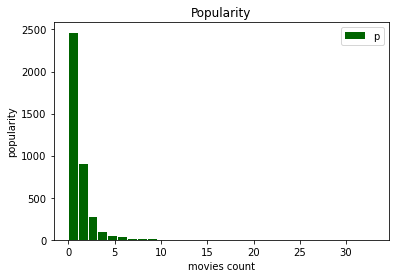

In [36]:
#plot the popularity
histplot('popularity','darkgreen', 'Popularity');
plt.xlabel('movies count');
plt.ylabel('popularity');
plt.legend('popularity');

> here I used top_vote data because vote_average and popularity did not have NaN value

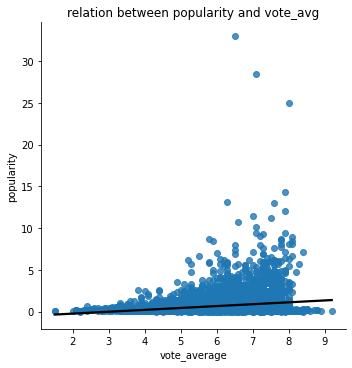

In [37]:
scatterVote("vote_average","popularity",top_vote, "relation between popularity and vote_avg")

# Answer Question 6
From the plots above there is a relationship between the hight vote average and popularity

i.e. The higher the popularity, the higher the vote average

<h1><a id='q7'> Question7: Is there any relation between budget and revenue?</a></h1>


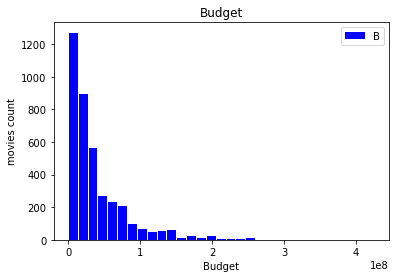

In [38]:
# plot Budget
histplot('budget','blue', 'Budget')
plt.xlabel('Budget'),
plt.ylabel('movies count')
plt.legend('Budget')

>Here I use df_drp data when we droped all NaN value because i used budget, revenue to compare

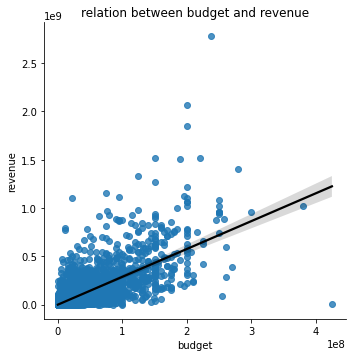

In [39]:
scatterVote("budget","revenue",df_drp, "relation between budget and revenue")

# Answer Question 7:

This is a positive relationship. i.e. the more the budget the more revenue a movie makes


<a href='#top'>Go to Top of page ^ </a>

<a id='conclusions'></a>
## Conclusions

As a conclusion 

>**first we found the top 10 type of films produced:**

<ol>
    <li>Drama</li><li>Comedy</li>  <li>Action</li> <li>Adventure</li> <li>Horror</li> <li>Crime</li> <li>Thriller</li> <li>Fantasy</li> <li>Animation</li> 
</ol>  

>**Second The top 10 budget and highest profit films are:**
<ol>
    <li>Avatar: <b>2.544506e+09</b> </li>
<li>Star Wars: The Force Awakens:	<b>1.868178e+09</b></li>
<li>Titanic:	<b>1.645034e+09</b></li>
<li>Jurassic World	<b>1.363529e+09</b></li>
<li>Furious 7	<b>1.316249e+09</b></li>
<li>The Avengers	<b>1.299558e+09</b></li>
<li>Harry Potter and the Deathly Hallows: Part 2	<b>1.202818e+09</b></li>
<li>Avengers: Age of Ultron	<b>1.125036e+09</b></li>
<li>Frozen	<b>1.124219e+09</b></li>
    <li>The Net	<b>1.084280e+09</b></li>
</ol>

> **Third Top 10 vote average movies:**
<ol>
<li> Pink Floyd: Pulse</li>
<li> Queen - Rock Montreal</li>
<li> A Personal Journey with Martin Scorsese Throug...</li>
<li> The Art of Flight	</li>
<li> The Shawshank Redemption	</li>
<li> The Jinx: The Life and Deaths of Robert Durst</li>
<li> Guten Tag, RamÃ³n	</li>
<li> Stop Making Sense</li>
<li> The Century of the Self</li>
<li> Shoah</li>
</ol>

> **After that i searched about relationships between some data:**

</ol>
<li>between vote average and runtime of movies</li>
<li>between popularity and runtime</li>
<li>between popularity and vote_avg</li>
<li>relation between budget and revenue</li>
</ol>

>**In all the comparisons above, in which I searched for relationships, I found A positive relationship, the higher the value of one of them, the higher the value of the second, depending on scatterplot to highlight the results**


<h2>Limitations</h2>

> There is a large group of movies that did not record the value of their budget, revenue, or even the runtime, which made it difficult to analyze all the data together, which caused me to drop them in the stage of searching for relationships.

> In addition to the fact that this data is old, the last recording in it was in 2015. We suggest that there be serious updates to the data
 

<a href='#top'>Go to Top of page ^ </a>

In [40]:
df.to_csv('df_movies_final.csv',index = False)